In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### To the lab for testing

In [4]:
stack_overflow = pd.read_feather(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\28_Hypothesis_Testing_in_Python\datasets\stack_overflow.feather")
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


A hypothesis:
- The mean annual compensation of the population of data scientists is $110,000

In [5]:
#The point estimate (sample statistic)

mean_comp_samp = stack_overflow['converted_comp'].mean()
mean_comp_samp

119574.71738168952

In [6]:
# Vemos que a média é diferente da hipotese, mas como saber se a diferença é significativamente diferente? Para isso precisamos gerar uma distribuição bootstrap dessas médias amostrais.

# Step 3. Reapeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        # Step 2. Calculate point estimate
        np.mean(
            #Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
    )

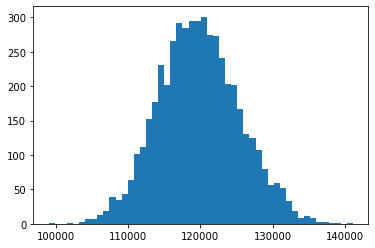

In [8]:
#Visualizing the bootstrap distribution

plt.hist(so_boot_distn, bins=50)
plt.show()

In [9]:
# O desvio padrão das estatísticas amostrais na distribuição bootstrap estimam o erro padrão da estatística.

std_error = np.std(so_boot_distn, ddof=1) #pesquisar sobre ddof
std_error

5603.702579329989

In [11]:
#Como as variáveis tem unidades e intervalos arbitrários, antes de testarmos nossa hipótese, precisamos padronizar os valores

mean_comp_hyp = 110000 #media da hipotese
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score
#como definir se o valor é muito alto ou não???

1.7086412503417217

### Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

Let's begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In [12]:
late_shipments = pd.read_feather(r"C:\Users\vnlvi\Downloads\Projetos\DataCamp\Estudos_Python_Ciencia_de_Dados\28_Hypothesis_Testing_in_Python\datasets\late_shipments.feather")
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [20]:
#Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes"
# Calculate the proportion of late shipments
late_prop_samp = late_shipments['late'].value_counts(normalize=True)['Yes']#len(late_shipments[late_shipments['late']=='Yes'])/len(late_shipments)

# Print the results
print(late_prop_samp)

0.061


### Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

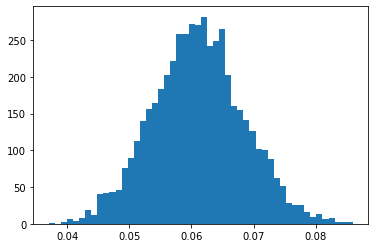

In [22]:
# Step 3. Reapeat steps 1 & 2 many times, appending to a list
late_shipments_boot_distn = []
for i in range(5000):
    #Step 1. Resample
    df_bootstrap = late_shipments.sample(frac=1, replace = True)
    # Step 2. Calculate point estimate
    point_estimate = df_bootstrap['late'].value_counts(normalize=True)['Yes']
    late_shipments_boot_distn.append(point_estimate)

#Visualizing the bootstrap distribution
plt.hist(late_shipments_boot_distn, bins=50)
plt.show()

In [23]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
""" 
The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.
"""
print(z_score)

0.13319764705636444


### A tail of two z's

In [24]:
#Calculating the z-score
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
prop_child_samp

0.39141972578505085

In [26]:
stack_overflow['age_first_code_cut'].value_counts(normalize=True)['child']

0.39141972578505085

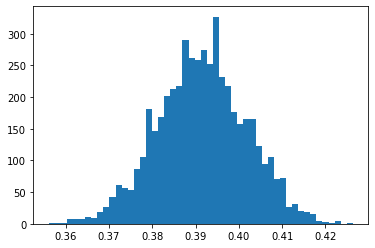

In [27]:
#Ha: The proportion of data scientists starting programming as children is greater than 35%
prop_child_hyp = 0.35

#Bootstrap
# Step 3. Reapeat steps 1 & 2 many times, appending to a list
first_code_boot_distn = []
for i in range(5000):
    #Step 1. Resample
    df_bootstrap = stack_overflow.sample(frac=1, replace = True)
    # Step 2. Calculate point estimate
    point_estimate = df_bootstrap['age_first_code_cut'].value_counts(normalize=True)['child']
    first_code_boot_distn.append(point_estimate)

#Visualizing the bootstrap distribution
plt.hist(first_code_boot_distn, bins=50)
plt.show()

In [28]:
std_error = np.std(first_code_boot_distn,ddof=1)
std_error

0.010309857241621237

In [29]:
z_score = (prop_child_samp - prop_child_hyp)/ std_error
z_score

4.017487809417774

- Le-tailed test → use norm.cdf() .
- Right-tailed test → use 1 - norm.cdf() .

In [35]:
#Calculating the p-value
from scipy.stats import norm

#loc=0 média zero e desvio padrão de um  scale =1
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

2.9410938654494956e-05

### Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, , is that the proportion of late shipments is six percent.

The alternative hypothesis, , is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

In [36]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.461365359859103


### Statistically significant other
- p-values quantify evidence for the null hypothesis
- Large p-value → fail to reject null hypothesis
- Small p-value → reject null hypothesis

### Significance level
The signicance level of a hypothesis test (α) is the threshold point for "beyond a
reasonable doubt.

Common values of α are 0.2 , 0.1 , 0.05 , and 0.01

In [37]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn,ddof=1)
z_score = (prop_child_samp - prop_child_hyp)/ std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

2.9410938654494956e-05

In [39]:
p_value <= alpha

True

Reject null hypotesis in favor of alternative hypotesis

In [40]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower,upper))

(0.3710747456877488, 0.41132242370632466)


### Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

In [43]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


#### Question
Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

    Yes, since 0.06 is included in the 95% confidence interval and we failed to reject  due to a large p-value, the results are similar.